# Darkstores Locator

### Problem Description

Darkstores : A darkstore is basically a brick-and-mortar location that has been shut down and turned into a center for fulfillment operations. These distribution outlets are not open to visitors, allowing more space for store inventory and to quickly and accurately fulfill orders.

In this project I have tried to find optimal locations for darkstores for instant delivery service application like Zepto, Swiggy Instamart, Blinkit etc. by using location of resturaunts that are vendors on food delivery applications of these companies.

I have assumed that customers for these companies would be the one who are using these application for their food delivery services, thus they are living nearby the resturaunts.

Ideally customer location should be used to find dark store locations but the dataset for that was not available.

### Code

In [1]:
# Importing all required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Reading dataset in csv form using pandas.
dataset = pd.read_csv('Dataset/OnlineDeliveryData.csv',encoding="ISO-8859-1")

In [3]:
# Dropping all the columns that are not required (Cleaning data).
customerLocation = dataset.values[:,7:9]

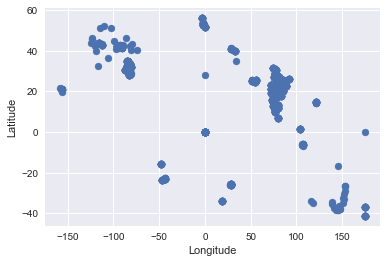

In [4]:
# Visualizing dataset
plt.figure(0)
plt.style.use("seaborn")
plt.scatter(customerLocation[:,0],customerLocation[:,1])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

#### Hardcoding K-Means Logic

In [5]:
numOfStores = 2 # Number of darkstores need to be located.
storeLocation = {} # Location of the darkstores will be stored here.
# Giving random location to the darkstores.
for i in range(numOfStores):
    center = 20*np.random.random(customerLocation.shape[1],)
    points = []
    cluster = {
        'center' : center,
        'points' : points,
    }
    storeLocation[i] = cluster

In [6]:
# Function for calculatin distance
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [7]:
# E-Step 
def assignPointToClusters(clusters,X,k):
    for i in range(X.shape[0]):
        dist = []
        curr_x = X[i]
        for j in range(k):
            d = distance(curr_x,clusters[j]['center'])
            dist.append(d)
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)

# M-Step
def updateClusters(clusters):
    for i in range(len(clusters.keys())):
        pts = np.array(clusters[i]['points'])
        if pts.shape[0]>0:
            new_u = pts.mean(axis=0)
            clusters[i]['center'] = new_u
            clusters[i]['points'] = []

In [8]:
# Repeating E-Step and M-Step till we find the optimum darkstores location.
for i in range(25):
    assignPointToClusters(storeLocation,customerLocation,numOfStores)
    updateClusters(storeLocation)

{0: {'center': array([72.95656747097463, 25.497349760028285], dtype=object), 'points': []}, 1: {'center': array([-78.18189710197494, 31.608465366451597], dtype=object), 'points': []}}


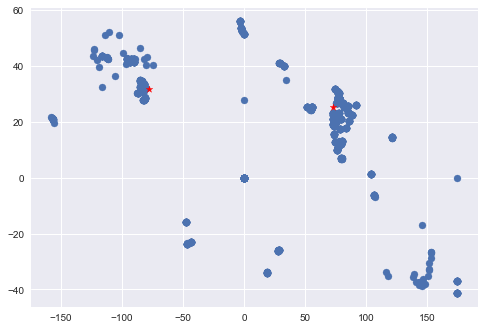

In [9]:
# Visualizing the stores location we get after K-Means.
print(storeLocation)
plt.scatter(customerLocation[:,0],customerLocation[:,1])
for i in range(len(storeLocation.keys())):
    plt.scatter(storeLocation[i]['center'][0],storeLocation[i]['center'][1],color='red',marker='*')
plt.show()

#### Using SK-Learn Library

In [10]:
# Applying K-Means using SK-Learn library.
storeLocator = KMeans(n_clusters=2)
storeLocator.fit(customerLocation)

KMeans(n_clusters=2)

In [11]:
# Storelocation we get after applying K-Means.
storeLocation = storeLocator.cluster_centers_

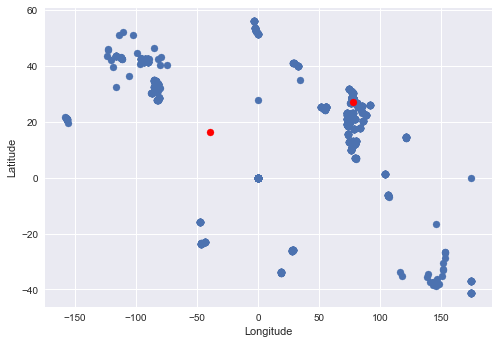

In [12]:
# Visualizing the stores location we get after K-Means.
plt.figure(0)
plt.style.use("seaborn")
plt.scatter(customerLocation[:,0],customerLocation[:,1])
plt.scatter(storeLocation[:,0],storeLocation[:,1],c='red')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()